# Project 4: Merging & Cleaning & Transforming Data (Movies Dataset)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 4 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## Introduction / Getting the Datasets

1. __Load__ and __inspect__ the datasets "movies_clean.csv" and "credits.csv". __Identify__ stringified/nested __json columns__ in the __credits__ dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

In [2]:
movies = pd.read_csv('movies_clean.csv')
movies[movies.duplicated(subset = ['id', 'title']) == True]

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path


<AxesSubplot:>

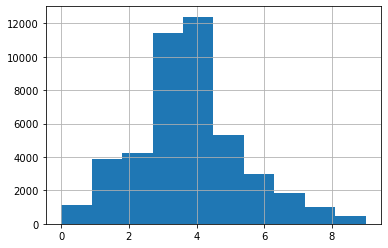

In [3]:
movies.isna().sum(axis = 1).hist()

In [4]:
movies.dtypes

id                         int64
title                     object
tagline                   object
release_date              object
genres                    object
belongs_to_collection     object
original_language         object
budget_musd              float64
revenue_musd             float64
production_companies      object
production_countries      object
vote_count               float64
vote_average             float64
popularity               float64
runtime                  float64
overview                  object
spoken_languages          object
poster_path               object
dtype: object

In [5]:
credits = pd.read_csv('credits.csv')
credits.columns

Index(['cast', 'crew', 'id'], dtype='object')

In [6]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
columns = ['cast', 'crew']
for l in columns:
    credits[l] = credits[l].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)

In [ ]:
credits.casta.apply()

In [72]:
credits['cast_size'] = credits.cast.apply(lambda x: len(x) if isinstance(x,list) else np.nan)
credits.cast_size.replace(0, np.nan, inplace = True)

In [73]:
credits.cast = credits.cast.apply(lambda x : '|'.join(i['name'] for i in x) if isinstance(x, list) else np.nan)

In [75]:
credits['crew_size'] = credits.crew.apply(lambda x: len(x) if isinstance(x, list) else np.nan)
credits.crew_size = credits.crew_size.replace(0, np.nan)

In [76]:
credits.crew[0]

[{'credit_id': '52fe4284c3a36847f8024f49',
  'department': 'Directing',
  'gender': 2,
  'id': 7879,
  'job': 'Director',
  'name': 'John Lasseter',
  'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f4f',
  'department': 'Writing',
  'gender': 2,
  'id': 12891,
  'job': 'Screenplay',
  'name': 'Joss Whedon',
  'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f55',
  'department': 'Writing',
  'gender': 2,
  'id': 7,
  'job': 'Screenplay',
  'name': 'Andrew Stanton',
  'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f5b',
  'department': 'Writing',
  'gender': 2,
  'id': 12892,
  'job': 'Screenplay',
  'name': 'Joel Cohen',
  'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f61',
  'department': 'Writing',
  'gender': 0,
  'id': 12893,
  'job': 'Screenplay',
  'name': 'Alec Sokolow',
  'profile_path': '/v79vlRYi94BZUQnkkyzn

In [85]:
def director_func(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']

In [87]:
credits['director'] = credits.crew.apply(lambda x: director_func(x) if isinstance(x, list) else np.nan)

## Preparing the Data for Merge

2. __Drop Duplicates__ in the credits datasets. (similar to Project 3)

In [96]:
credits[credits.duplicated(subset = ['id']) == True]

,cast,crew,id,cast_size,crew_size,director


In [95]:
credits.drop_duplicates(subset = ['id'], inplace = True)

## Merging the Data

3. __Merge/Join__ the datasets movies_clean and credits. -> Add the features __cast__ and __crew__ to the movies_clean dataset.

In [110]:
credits[~credits.id.isin(movies.id)]

,cast,crew,id,cast_size,crew_size,director
189,Kurtis Blow|Sean Combs|Snoop Dogg|Dr. Dre|Warr...,[],56088,8.0,NaN,None
554,Martha Plimpton|Kelly Lynch|Rutger Hauer,"[{'credit_id': '52fe4e4dc3a368484e21952d', 'de...",218473,3.0,2.0,Jennifer Warren
682,Amanda Plummer|Saskia Reeves|Kathy Jamieson|De...,"[{'credit_id': '52fe475cc3a36847f81317f7', 'de...",48260,14.0,2.0,Michael Winterbottom
685,Billy Burke|Jeffrey Dean Morgan|Lorraine Devon...,"[{'credit_id': '57a321c6c3a3683fa70013d8', 'de...",277270,6.0,3.0,Barry Caillier
711,,[],365371,NaN,NaN,None
...,...,...,...,...,...,...
45320,Aleksandra Popławska|Danuta Szaflarska|Magdale...,"[{'credit_id': '57ee6832c3a3682a2d003ccd', 'de...",418757,5.0,1.0,Grzegorz Jarzyna
45323,Zbigniew Suszyński|Agnieszka Kowalska|Henryk B...,"[{'credit_id': '564fd6a59251414b01005a8a', 'de...",369444,8.0,1.0,Magdalena Łazarkiewicz
45348,,[],335251,NaN,NaN,None
45420,Evgeniy Stychkin|Denis Burgazliev|Aleksandra K...,"[{'credit_id': '58d83051c3a368126f0567fe', 'de...",449131,4.0,2.0,Konstantin Murzenko


In [111]:
movies[~movies.id.isin(credits.id)]

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path


In [98]:
df =movies.merge(credits, how = 'inner', left_on = 'id', right_on = 'id')

## Cleaning and Transforming the new "Cast" Column

4.  __Evaluate__ Python Expressions in the stringified column "cast" and __remove quotes__ ("") where possible.

5. __Determine__ the __cast size__ for all movies (number of actors) and add the additional column "cast_size".

6. __Extract__ all __actor names__ from the column "cast" and __overwrite__ "cast". If a movie has more than one actor, __seperate names by a pipe__ "|".<br>
For example: The value in the first row (Toy Story) should be 'Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette'.

7. __Inspect__ cast with value_counts(). Do you see anything strange? __Take reasonable measures__!

## Cleaning and Transforming the new "Crew" Column

8.  __Evaluate__ Python Expressions in the stringified column "crew" and __remove quotes__ ("") where possible.

9. __Determine__ the __crew size__ for all movies (size of the crew) and add the additional column "crew_size".

10. __Extract__ the __director name__ from the column "crew" and create the new column "director". <br> For example: The value in the first row (Toy Story) should be 'John Lasseter'.

## Final Steps

11. __Drop__ the column "crew" and __save__ the dataset in a csv-file.

In [102]:
df = df.drop(labels = 'crew', axis = 1)

In [103]:
df.to_csv('merged_dataset.csv')

# +++++++++ See some Hints below +++++++++++++

# ++++++++++++++++ Hints++++++++++++++++++++

__Hints for 2.__<br>
There cannot be two or more movies with the same movie id.

__Hints for 3.__<br>
You can use a left join with movies_clean as left dataset and credits as right dataset.

__Hints for 4.__<br>
This is very similar to Question 3 in Project 3.

__Hints for 5.__<br> 
apply an appropriate lambda function on all column elements.

__Hints for 6.__<br>
This is very similar to Questions 4-8 in Project 3.

__Hints for 7.__<br>
This is very similar to Question 9 in Project 3.

__Hints for 10.__<br> 
apply an appropriate user-defined function (a bit more complex) on all column elements.